In [ ]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Basic exploration
print(train_data.head())
print(train_data['Class Index'].value_counts())


   Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  
3    30000
4    30000
2    30000
1    30000
Name: Class Index, dtype: int64


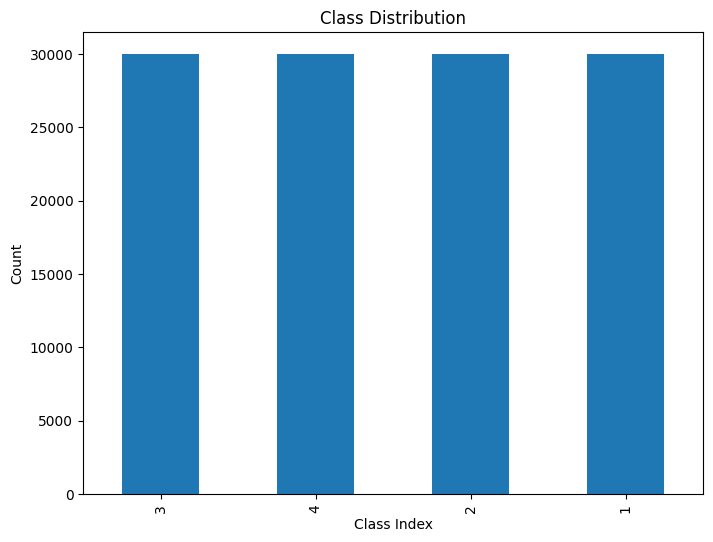

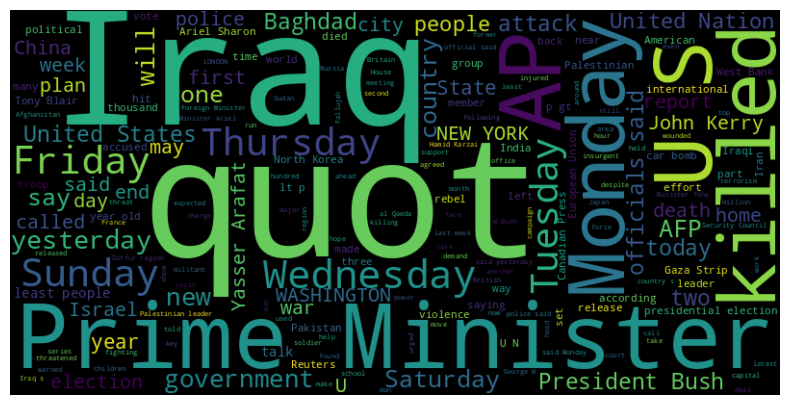

In [ ]:
import matplotlib.pyplot as plt

# Visualize class distribution
plt.figure(figsize=(8, 6))
train_data['Class Index'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.show()

# (Optional) Word cloud visualization for each class using WordCloud library
from wordcloud import WordCloud

# Example for a specific class (repeat for all classes)
text_for_wordcloud = " ".join(train_data[train_data['Class Index'] == 1]['Description'])
wordcloud = WordCloud(width=800, height=400).generate(text_for_wordcloud)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import spacy

# Download necessary resources for NLTK
nltk.download('punkt')
nltk.download('wordnet')

# Initialize spaCy (for lemmatization)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Initialize NLTK components (for stemming and lemmatization)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocessing function with tokenization, lemmatization, and stemming
def preprocess_text(text):
    text = re.sub(r'\\n', ' ', text)  # Remove escaped newlines
    text = re.sub(r'""', '"', text)  # Fix double quotes

    # Tokenization using NLTK
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase

    # Lemmatization using spaCy
    lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(tokens))]

    # Stemming using NLTK
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]

    return " ".join(stemmed_tokens)

# Apply preprocessing to the dataset
train_data['Title'] = train_data['Title'].apply(preprocess_text)
train_data['Description'] = train_data['Description'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Prepare data for model building
X_train = train_data['Title'] + ' ' + train_data['Description']
y_train = train_data['Class Index']

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)

# Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# (Optional) Model evaluation on test data
X_test = test_data['Title'] + ' ' + test_data['Description']
y_test = test_data['Class Index']
X_test_tfidf = tfidf.transform(X_test)
y_pred = nb_classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.89      0.85      0.87      1900
           2       0.89      0.95      0.92      1900
           3       0.81      0.80      0.81      1900
           4       0.83      0.82      0.82      1900

    accuracy                           0.85      7600
   macro avg       0.85      0.85      0.85      7600
weighted avg       0.85      0.85      0.85      7600

Accuracy: 0.8548684210526316
